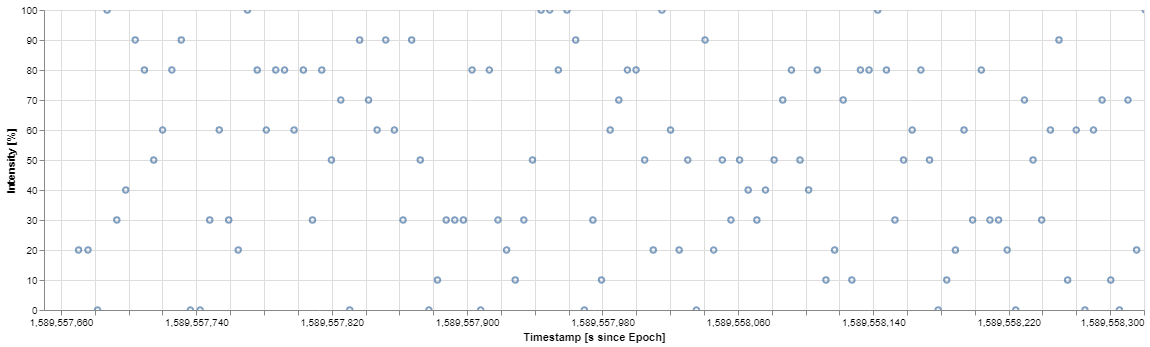

In [10]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

alt.data_transformers.enable('json')
command_intensity_times = pd.read_csv('command_intensity_times.csv')
logger_times_intensity = pd.read_csv('logger_times_intensity.csv')

# Timeline has too much data, calculate properties instead
commands = alt.Chart(command_intensity_times).mark_point(clip=True).encode(
    alt.X('After', scale=alt.Scale(domain=(1589557666, (1589557666 + 600))), title='Timestamp [s since Epoch]'),
    alt.Y('Value', title='Intensity [%]'),
).properties(
    width=1100
)
#logs = alt.Chart(command_intensity_times).mark_point(clip=True).encode(
#    alt.X('After', scale=alt.Scale(domain=(1589557666, (1589557666 + 600))), title='Timestamp [s since Epoch]'),
#    alt.Y('Value', title='Intensity [%]'),
#).properties(
#    width=1100
#)

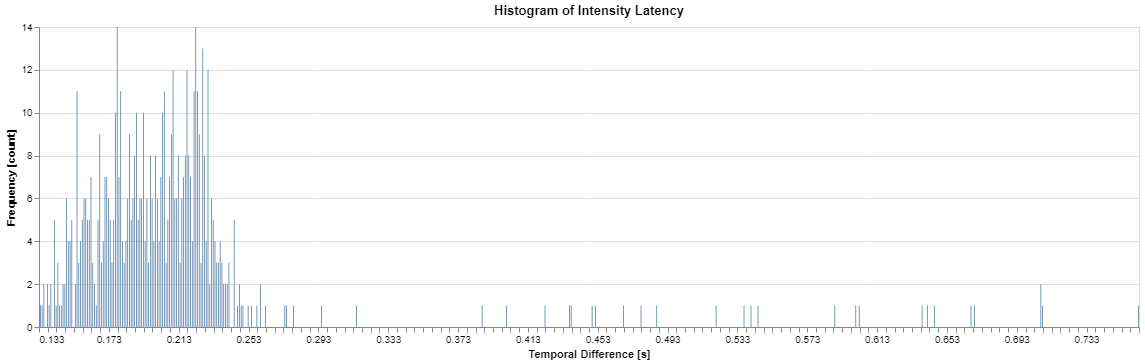

In [26]:
%config IPCompleter.greedy=True
import pandas as pd
import altair as alt

intensity_delays = pd.read_csv('intensity_delays.csv')

# Timeline has too much data, calculate properties instead
alt.Chart(intensity_delays).mark_bar(clip=True
                                                 ).transform_calculate(
    x='datum.LogTime - datum.CommandTime'
).encode(
    alt.X('x:Q', bin=alt.Bin(step=0.001), title='Temporal Difference [s]'),
    alt.Y('count()', title='Frequency [count]'),
).properties(
    width=1100,
    title='Histogram of Intensity Latency'
)